---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 3 _ part 2 

---

Please write your full name here
- **Name** : "Andrew Mushen"
- **BN**   : 15

## for jupyter

In [1]:
#%run tree_part2_functions.ipynb

## for any other ide
pls run this in your CMD 
## pip install import-ipynb

In [2]:
import import_ipynb
import tree_part2_functions_NB
from tree_part2_functions_NB import train_test_split, decision_tree_algorthim, print_tree, get_accuracy


importing Jupyter notebook from tree_part2_functions_NB.ipynb


## or just use this import the .py 

## importing tree functions

In [3]:
#import tree_part2_functions
#from tree_part2_functions import train_test_split, decision_tree_algorthim, print_tree, get_accuracy

## Data preparation

In [4]:
import random
import numpy as np
import pandas as pd
from pprint import pprint

df = pd.read_csv('tree task.csv', sep=';')
df =df.rename(columns={"A":"label"})

df


,Early_registration,Finished_homework_II,Senior,Likes_coffe,Liked_the_last_homework,label
0,1,1,0,0,1,1
1,1,1,1,0,1,1
2,0,0,1,0,0,0
3,0,1,1,0,1,0
4,0,1,1,0,0,1
5,0,0,1,1,1,1
6,1,0,0,0,1,0
7,0,1,0,1,1,1
8,0,0,1,0,1,1
9,1,0,0,0,0,0


## building the best model using tree funcitons

In [5]:
best_state = 0
best_size = 0
best_depth = 0
best_train_score = 0
best_test_score = 0
test = 0

for state in range(0, 5):
    for size in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]:
        for depth in [1, 2, 3, 4]:

            train_df, test_df = train_test_split(
                df, train_size=size, random_state=0)
            tree = decision_tree_algorthim(train_df, max_depth=depth)
            train_score = get_accuracy(train_df, tree)
            test_score = get_accuracy(test_df, tree)
            if (0.95 >= test_score > best_test_score):
                best_state = state
                best_size = size
                best_depth = depth
                best_train_score = train_score
                best_test_score = test_score
                #print(state, size, depth, train_score, train_score)


print("random_state", best_state, "train_size ",
      best_size, "best tree maxdepth", best_depth)

train_df, test_df = train_test_split(df, train_size=best_size)

mytree = decision_tree_algorthim(train_df, max_depth=best_depth)

train_score = get_accuracy(train_df, mytree)
test_score = get_accuracy(test_df, mytree)
print("my model train score", train_score)
print("my model train score", test_score)


random_state 0 train_size  0.65 best tree maxdepth 2
my model train score 0.4444444444444444
my model train score 0.8


## applying SKlearn to same data 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


xtrain = train_df[train_df.columns[:-1]]
ytrain = train_df[train_df.columns[-1]]

xtest = test_df[test_df.columns[:-1]]
ytest = test_df[test_df.columns[-1]]


tree_clf = DecisionTreeClassifier(
    max_depth=best_depth, random_state=best_state, criterion='entropy')
tree_clf.fit(xtrain, ytrain)

print("SKlearn train score", tree_clf.score(xtrain, ytrain))

print("SKlearn test score", tree_clf.score(xtest, ytest))


SKlearn train score 0.7777777777777778
SKlearn test score 0.8


## printing the tree

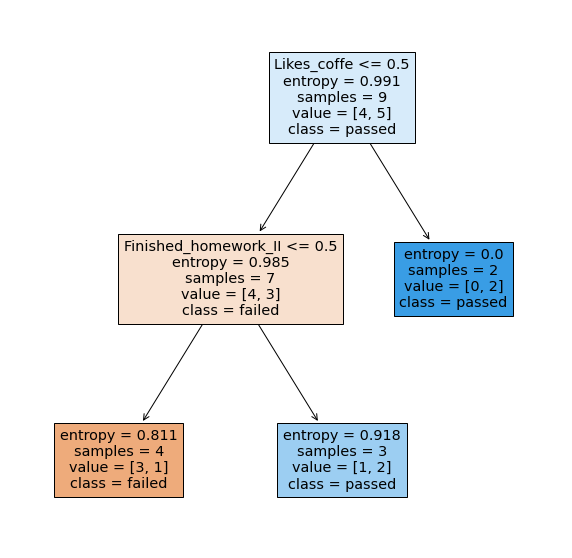

In [7]:
import matplotlib.pyplot as plt

from sklearn import tree


text_rep = tree.export_text(tree_clf)

fig = plt.figure(figsize=(10, 10))
_ = tree.plot_tree(tree_clf,
                   feature_names=df.columns[:-1],
                   class_names=('failed', 'passed'),
                   filled=True)


In [8]:
print_tree(mytree)

{'Likes_coffe == 1 ': [{'Finished_homework_II == 1 ': [0, 1]}, 1]}
